<a href="https://colab.research.google.com/github/Ayrsz/learning_pytorch/blob/main/LearningTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transform


In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Manipulando Tensores

In [3]:
#Inicializando tensores vazios
vazio = torch.empty((3,4))

#Preenche o vetor com valores aleatórios
print(vazio)
print(type(vazio))


tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.8306e-43, 2.8306e-43, 3.2230e-44, 4.7644e-44],
        [0.0000e+00, 0.0000e+00, 1.1351e-43, 0.0000e+00]])
<class 'torch.Tensor'>


**Criação de tensores básicos**

In [4]:
ones = torch.ones(3,4)
print(ones)

zeros = torch.zeros(3,4)
print(zeros)

#Set da set para números aleatórios na mão, não é necessário
torch.manual_seed(20)
random = torch.rand(1)
print(random)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([0.5615])


**Criação de tensor com mesmo shape de outro**

In [5]:
print("Original:")
x = torch.tensor([[3, 4], [0, 1]])
print(x)

print("One_like:")
one_like = torch.ones_like(x)
print(one_like)

print("Zero_like:")
zero_like = torch.zeros_like(x)
print(zero_like)

Original:
tensor([[3, 4],
        [0, 1]])
One_like:
tensor([[1, 1],
        [1, 1]])
Zero_like:
tensor([[0, 0],
        [0, 0]])


**Operações matematicas**

In [6]:
torch.manual_seed(30)
tensor_a = torch.randn(3, 4)
sep = 50*'-' + '\n'
print(" Tensor:")
print(tensor_a)

print(sep,"Função teto:")
print(torch.ceil(tensor_a))

print(sep, "Clip:")
print(torch.clamp(tensor_a, -0.5, 0.5))

print(sep, "Comparação elemento a elemento")
tensor_a_clipado = torch.clamp(tensor_a, -0.5, 0.5)
print(torch.eq(tensor_a, tensor_a_clipado))

print(sep, "Maximos e minimos:")
print("Retornando um tensor:")
print(torch.max(tensor_a))
print("Retornando um valor:")
print(torch.max(tensor_a).item())

print(sep, "Elementos unicos:")
print(torch.unique(torch.tensor([[1,1,1,1],[2,2,2,2]]))) #Retorna um vetor dos valores únicos


 Tensor:
tensor([[ 0.4705,  1.6563,  0.5153, -0.2744],
        [-2.2606,  1.2280,  0.7928,  0.6231],
        [-2.1520, -0.0252,  0.9949,  0.0494]])
--------------------------------------------------
 Função teto:
tensor([[ 1.,  2.,  1., -0.],
        [-2.,  2.,  1.,  1.],
        [-2., -0.,  1.,  1.]])
--------------------------------------------------
 Clip:
tensor([[ 0.4705,  0.5000,  0.5000, -0.2744],
        [-0.5000,  0.5000,  0.5000,  0.5000],
        [-0.5000, -0.0252,  0.5000,  0.0494]])
--------------------------------------------------
 Comparação elemento a elemento
tensor([[ True, False, False,  True],
        [False, False, False, False],
        [False,  True, False,  True]])
--------------------------------------------------
 Maximos e minimos:
Retornando um tensor:
tensor(1.6563)
Retornando um valor:
1.6563351154327393
--------------------------------------------------
 Elementos unicos:
tensor([1, 2])


**Alterando tensores por funções que fazem referência**

In [7]:
fibbonacci = torch.tensor([0, 1, 1, 2, 3, 5, 8, 13], dtype= torch.float32)
seno_fibbonacci = torch.sin(fibbonacci)
print("Original:\n", fibbonacci, "\nAplicado o seno:\n", seno_fibbonacci)

#Funções com "_" no final mudam o valor DA VARIÁVEL
seno_fibbonacci = torch.sin_(fibbonacci)
print("Original:\n", fibbonacci, "\nAplicado o seno:\n", seno_fibbonacci)

Original:
 tensor([ 0.,  1.,  1.,  2.,  3.,  5.,  8., 13.]) 
Aplicado o seno:
 tensor([ 0.0000,  0.8415,  0.8415,  0.9093,  0.1411, -0.9589,  0.9894,  0.4202])
Original:
 tensor([ 0.0000,  0.8415,  0.8415,  0.9093,  0.1411, -0.9589,  0.9894,  0.4202]) 
Aplicado o seno:
 tensor([ 0.0000,  0.8415,  0.8415,  0.9093,  0.1411, -0.9589,  0.9894,  0.4202])


In [8]:
#Quando igualamos a = b, temos que b SOFRE todas as alterações que a sofrer
zeros = torch.zeros(3, 2, dtype=torch.int32)
copiador = zeros

zeros[0][0] = 30

print("Original\n", zeros, "\nCopiador:\n", copiador)
print(sep)
print("Com clone")
copiador = zeros.clone()
zeros[0][1] = 20
print("Original\n", zeros, "\nCopiador:\n", copiador)



Original
 tensor([[30,  0],
        [ 0,  0],
        [ 0,  0]], dtype=torch.int32) 
Copiador:
 tensor([[30,  0],
        [ 0,  0],
        [ 0,  0]], dtype=torch.int32)
--------------------------------------------------

Com clone
Original
 tensor([[30, 20],
        [ 0,  0],
        [ 0,  0]], dtype=torch.int32) 
Copiador:
 tensor([[30,  0],
        [ 0,  0],
        [ 0,  0]], dtype=torch.int32)


**Mandando para a GPU**

In [9]:
if torch.cuda.is_available():
  print("Parabens, você tem uma GPU")
  imagem_otavio_o_gato = torch.rand((3, 100, 100), device = "cuda")
else:
  print("Desculpa, você tá pobre")
  imagem_otavio_o_gato = torch.rand((3, 100, 100), device = "cpu")


Desculpa, você tá pobre


In [10]:
#Maneira análoga a fazer oq tem em cima, mais concisa
if torch.cuda.is_available():
  my_device = "cuda"
else:
  my_device = "cpu"
print(f"Device: {my_device}")
imagem_otavio_o_gato = torch.rand((3, 100, 100), device = my_device)
#obs -> Tensores precisam estar na mesma unidade de processamento para interagirem

Device: cpu


In [11]:
#Mandar um tensor, já inicializado, para o device
imagem_otavio_o_gato = imagem_otavio_o_gato.to(my_device)

**Mudando o shape**

In [12]:
print("Antes do unsqueeze:")
tensor_aleatorio = torch.rand((3, 2, 4))
print(tensor_aleatorio.shape)
#Tensores são abstrações para vetores de 3 ou mais dimensões, ou seja... vetores de matrizes
#Porém, o "tensor aleatorio" é apenas uma matriz com três canais, queremos um vetor de imagens

#Insere uma nova dimensão na dimensão "0"
tensor_aleatorio.unsqueeze_(0)
print("Depois do unsqueeze:")
print(tensor_aleatorio.shape)

Antes do unsqueeze:
torch.Size([3, 2, 4])
Depois do unsqueeze:
torch.Size([1, 3, 2, 4])


In [13]:
torch.manual_seed(10)
a = torch.rand((1,2, 1, 2))

#O vetor tem duas dimensões com tamanho "1", o método squeeze simplifica esses vetores
# (1, 2, 1,2) -> (2, 2)
#Fazendo uma comparação com uma imagem em tons de cinza...
#Se usamos squeeze, a imagem deixa de ser um "Canal" e vira uma matriz

print("Antes do squeeze:")
print(a.shape)

a.squeeze_()
print("Depois do squeeze:")
print(a.shape)

Antes do squeeze:
torch.Size([1, 2, 1, 2])
Depois do squeeze:
torch.Size([2, 2])


**Gerando um tensor apartir de um array numpy**

In [14]:
x = np.array([1, 2, 3, 4], dtype = np.int32)
y = torch.from_numpy(x)

print("Numpy Array:\n", x)
print("Tensor:\n", y)


Numpy Array:
 [1 2 3 4]
Tensor:
 tensor([1, 2, 3, 4], dtype=torch.int32)


## Auto-grad


Requires grad

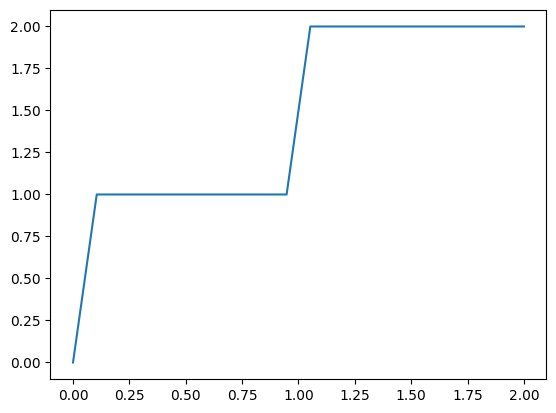

In [137]:
#Guardar operações realizadas no tensor
a = torch.linspace(0, 2, steps = 20, dtype = torch.float32, requires_grad = True)
b = torch.ceil(a)

plt.plot(a.detach(), b.detach())

Regra da cadeia


In [138]:
#Perceba que o gradiente está sendo computado
print(b.grad_fn)
c = torch.sin(b)
print(c.grad_fn)
d = torch.cos(c)
print(d.grad_fn)
#Facilita a regra da cadeia!!!

In [139]:
print("Gradientes armazenados em caeda nivel de aplicação da funcao")
print("D:")
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)




Gradientes armazenados em caeda nivel de aplicação da funcao
D:
((<SinBackward0 object at 0x7c8cb2c86da0>, 0),)
((<CeilBackward0 object at 0x7c8cb2c875e0>, 0),)
((<AccumulateGrad object at 0x7c8cb2c870a0>, 0),)
()


Calcular o gradiente

In [140]:
#Beleza e a aplicação da regra da cadeia, onde que ocorre?
saida = d.sum()
print(saida)
#BACKWARD! Calcula o gradiente em si
saida.backward()
print(a.grad)

tensor(13.1403, grad_fn=<SumBackward0>)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [141]:
#O gradiente é calculado apenas para o input do modelo, no caso, o tensor "a"
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
None
None
None


<ipython-input-141-5132a9b8bd22>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(b.grad)
<ipython-input-141-5132a9b8bd22>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more i

Exemplo com um modelo

In [142]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        # Entrada de mil, saida de 100, as funções de implementação de camadas já tem
        # autograd embutido!loss
        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()

        #Entrada de 100, saida de 10
        self.layer2 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

entrada = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
saida_ideal = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [143]:
#Perceba que nas proprias camadas já temos o gradiente
print(model.layer1.weight[0][0:10])


tensor([-0.0069, -0.0020,  0.0273, -0.0162, -0.0050, -0.0081, -0.0146, -0.0300,
         0.0195,  0.0130], grad_fn=<SliceBackward0>)


In [144]:
otimizador = torch.optim.SGD(model.parameters(), lr = 0.001)

saida = model.forward(entrada)

loss = torch.sqrt((saida_ideal - saida).pow(2).sum())

#A loss tem um gradiente também, pelo fato da saida ter
print(loss)

tensor(12.0165, grad_fn=<SqrtBackward0>)


In [145]:
#Agora que temos a forma dos gradientes setados e a função de perda, iremos realizar o CÁLCULO dessas correções do gradiente
#Depois desse passo, TODAS camadas terão um .grad, pois ela não apenas referenciam um "método" para cálculo e sim obtem valores
#Para ajustar os pesos do modelo
loss.backward()


In [147]:
parametros = model.layer1.weight.grad
print(parametros)

tensor([[-0.0258,  0.0226, -0.0136,  ..., -0.0556,  0.0139,  0.0323],
        [ 0.0200, -0.0287, -0.0049,  ..., -0.0516,  0.0748,  0.1140],
        [ 0.0038, -0.0938,  0.0181,  ..., -0.0412, -0.0092,  0.0075],
        ...,
        [ 0.0622,  0.0089, -0.0505,  ..., -0.0172, -0.0218,  0.0089],
        [-0.0017, -0.0036,  0.0102,  ..., -0.0159,  0.0082, -0.0201],
        [ 0.0127, -0.0183, -0.0078,  ...,  0.0093,  0.0218, -0.0110]])


In [136]:
#Nesse ponto, os pesos não foram alterados, quem faz esse papel é o otimizador
otimizador.step()

#Etapa muito importante, pois o modelo precisa de um novo gradiente a cada entrada, se
# o gradiente NÃO FOR zerado, ira somar os valores antigos com os novos ...
otimizador.zero_grad()

In [152]:
tensor_gradiente = torch.linspace(0, 2, 50, requires_grad = True)
print(tensor_gradiente)

#Criar CÓPIA SEM gradiente
tensor_sem_gradiente = tensor_gradiente.detach()
print(tensor_sem_gradiente)


tensor([0.0000, 0.0408, 0.0816, 0.1224, 0.1633, 0.2041, 0.2449, 0.2857, 0.3265,
        0.3673, 0.4082, 0.4490, 0.4898, 0.5306, 0.5714, 0.6122, 0.6531, 0.6939,
        0.7347, 0.7755, 0.8163, 0.8571, 0.8980, 0.9388, 0.9796, 1.0204, 1.0612,
        1.1020, 1.1429, 1.1837, 1.2245, 1.2653, 1.3061, 1.3469, 1.3878, 1.4286,
        1.4694, 1.5102, 1.5510, 1.5918, 1.6327, 1.6735, 1.7143, 1.7551, 1.7959,
        1.8367, 1.8776, 1.9184, 1.9592, 2.0000], requires_grad=True)
tensor([0.0000, 0.0408, 0.0816, 0.1224, 0.1633, 0.2041, 0.2449, 0.2857, 0.3265,
        0.3673, 0.4082, 0.4490, 0.4898, 0.5306, 0.5714, 0.6122, 0.6531, 0.6939,
        0.7347, 0.7755, 0.8163, 0.8571, 0.8980, 0.9388, 0.9796, 1.0204, 1.0612,
        1.1020, 1.1429, 1.1837, 1.2245, 1.2653, 1.3061, 1.3469, 1.3878, 1.4286,
        1.4694, 1.5102, 1.5510, 1.5918, 1.6327, 1.6735, 1.7143, 1.7551, 1.7959,
        1.8367, 1.8776, 1.9184, 1.9592, 2.0000])


## Criando modelos

## AlexNet

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    #Estrutura da lenet, sem os polimentos
    #Imagem preto e branco (input) -> 6 Canais como mapas de caracteristicas
    self.c1 = nn.Conv2d(1, 6, 3)
    self.c2 = nn.Conv2d(6, 16, 3)
    self.l1 = nn.Linear(16*6*6, 120)
    self.l2 = nn.Linear(120, 84)
    self.l3 = nn.Linear(84, 10)

  def forward(self, x):
    #Duas camadas iguais de max_pool, porém se for um pool quadrádico n precisa especificar o shape
    x = F.max_pool2d(F.relu(self.c1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.c2(x)), 2)
    #Agora para dar input na camada linear precisamos linearizar a saida da conv2
    x = x.view(-1, self.number_neurons(x))
    x = F.relu(self.l1(x))
    x = F.relu(self.l2(x))
    x = self.l3(x)
    return x

  def number_neurons(self, x):
    size = x.size()[1:] #Ignora a primeira dimensão, que é o tamanho do batch
    features = 1
    for s in size:
      features = features * s
    return features

model = LeNet()
input = torch.rand(1, 1, 32, 32)
print('\nImage batch shape:')
print(input.shape)
print(f"\noutput do modelo:\n{model.forward(input)}")

#Tensores consideram que você está trabalhando com várias imagens, por isso o tipo fica
# "(Num_imagens, Canais_cor, Altura, Largura)"


Image batch shape:
torch.Size([1, 1, 32, 32])

output do modelo:
tensor([[ 0.0187, -0.0842,  0.1202, -0.1204, -0.0097,  0.0857, -0.1104, -0.0824,
          0.0128, -0.0730]], grad_fn=<AddmmBackward0>)


### Setting Dataset

In [ ]:
transformation = transform.Compose([transform.ToTensor(), transform.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5)), transform.Grayscale(num_output_channels = 1)]) # Normalize((Media_cada_canal_cor), (Desvio_padrao_cada_canal_cor))
#Adaptação das imagens para tensores e posteriormente normalizando os valores da matriz pois o gradiente funciona melhor com valores próximos de 0

In [ ]:
dataset = torchvision.datasets.CIFAR10(root = "./dataset", train = True, transform = transformation, download=True)
#root -> Diretório onde será escrito o dataset
#Train -> Dados serão usados para treinamento e teste
#Transform -> Aplica a todo o dataset quando da load

100%|██████████| 170M/170M [00:02<00:00, 77.4MB/s]


Extracting ./dataset/cifar-10-python.tar.gz to ./dataset


In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 4, shuffle = True, num_workers = 2)
#O data loader não sabe nada sobre as informações, apenas separa os batches.

In [ ]:

for i, (imagens,classes) in enumerate(dataloader):
  print("Imagens do batch especificado (4 por vez)")
  print(f"shape: {imagens.shape}\n")

  print("Classes das 4 imagens fornecidas:")
  print(f"{classes}")
  break

Imagens do batch especificado (4 por vez)
shape: torch.Size([4, 1, 32, 32])

Classes das 4 imagens fornecidas:
tensor([1, 6, 9, 3])


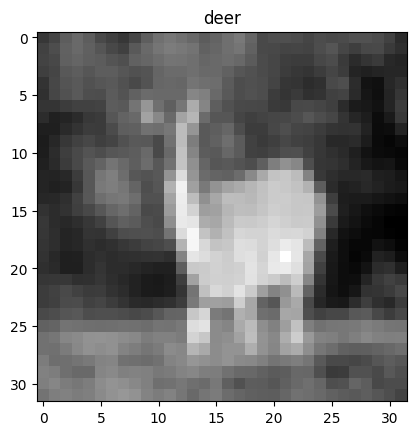

In [ ]:

classes = {
    0: 'plane',
    1: 'car',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
    }

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

def random_sampling(loader, num_amostras):
  size = len(loader)

  for i in range(num_amostras):
    idx = np.random.randint(0, size-1)
    imagem, label = loader[idx]
    imagem = torch.reshape(imagem, (32, 32, 1))
    plt.title(classes[label])
    plt.imshow(imagem, cmap='gray')

random_sampling(dataset, 1)